In [1]:
# Importing
%matplotlib inline
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
import seaborn as sns

In [2]:
from data_handler.DataHandler import DataHandler

In [3]:
handler = DataHandler(readAllDataNow = True) 

In [4]:
columns = ['TarX', 'TarY', 'GazeX', 'GazeY', 'PosX', 'PosY', 'PosZ', 'OrX', 'OrY', 'OrZ']

In [5]:
subjects_raw = {i: handler.getAllDatasetPairsFor(i) for i in range(1, 4)}

In [6]:
subjects = {}
correlations = []
for subj in subjects_raw:
    subjects[subj] = {}
    for t in subjects_raw[subj]:
        concatenated = np.concatenate((subjects_raw[subj][t][0],
                                       subjects_raw[subj][t][1][:, :8]), 
                                      axis = 1)
        df = pd.DataFrame(concatenated, columns = columns)
        df[['TarX', 'GazeX']] =  -1*df[['TarX', 'GazeX']]/5 + 192
        df[['TarY', 'GazeY']] = df[['TarY', 'GazeY']]/5 + 55
        subjects[subj][t] = df # (df-df.min())/(df.max()-df.min())
        correlations.append(subjects[subj][t].corr())

In [7]:
corr_df = correlations[0].copy()

In [8]:
for df in correlations[1:]:
    corr_df = corr_df.add(df)

In [9]:
corr_df

,TarX,TarY,GazeX,GazeY,PosX,PosY,PosZ,OrX,OrY,OrZ
TarX,51.000000,-2.500604,43.888994,-6.006445,46.557979,1.881138,-0.851850,-5.642278,-43.060004,-14.997127
TarY,-2.500604,51.000000,-5.371642,38.017889,-4.547701,42.377532,-5.405762,33.383731,5.942805,4.380043
GazeX,43.888994,-5.371642,51.000000,-9.967838,48.316198,-0.974653,3.198433,-10.198634,-50.720447,-18.725453
GazeY,-6.006445,38.017889,-9.967838,51.000000,-8.974062,42.223341,-10.308107,49.561572,10.387468,5.666886
PosX,46.557979,-4.547701,48.316198,-8.974062,51.000000,-0.416816,0.911856,-8.704534,-47.508796,-15.282891
PosY,1.881138,42.377532,-0.974653,42.223341,-0.416816,51.000000,-5.448271,36.392414,1.906655,3.240552
PosZ,-0.851850,-5.405762,3.198433,-10.308107,0.911856,-5.448271,51.000000,-13.987504,-4.305766,2.293959
OrX,-5.642278,33.383731,-10.198634,49.561572,-8.704534,36.392414,-13.987504,51.000000,10.577252,4.966911
OrY,-43.060004,5.942805,-50.720447,10.387468,-47.508796,1.906655,-4.305766,10.577252,51.000000,18.623401
OrZ,-14.997127,4.380043,-18.725453,5.666886,-15.282891,3.240552,2.293959,4.966911,18.623401,51.000000


In [10]:
avg = corr_df/len(correlations)

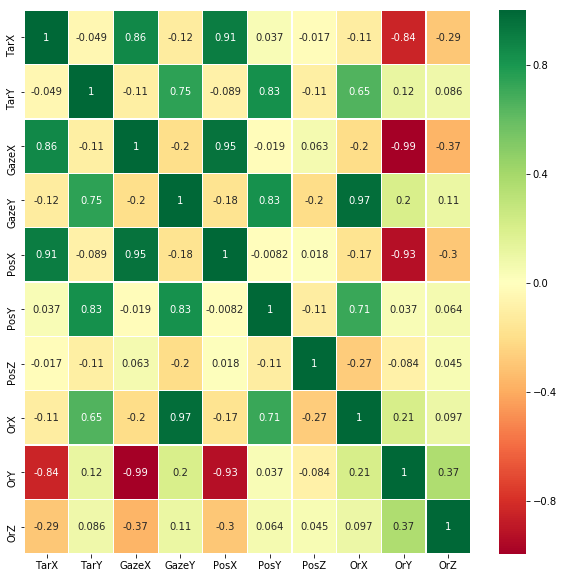

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(avg, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);

In [12]:
table = avg[['TarX', 'TarY', 'GazeX', 'GazeY']].T.drop(columns=['TarX', 'TarY'])

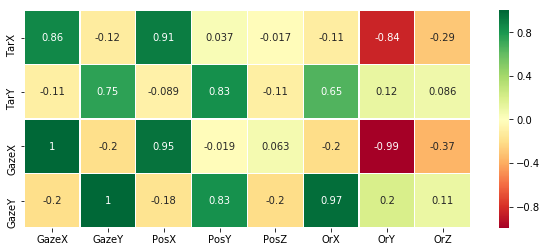

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(table, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);